In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as scq
from scqubits import HilbertSpace, InteractionTerm, ParameterSweep

import numpy as np

# Parameter Sweeps: Basic
Determining the dependence of physical observables on an external parameter is a common way to gain intuition for the properties and behavior of a system. Such parameter sweeps can be performed with scqubits on multiple levels: 

* at the level of a single qubit,
* at the level of a composite quantum system.

At the single-qubit level, each qubit class provides several methods that enable producing parameter sweep data and plots. Central quantities of interest, in this case, are energy eigenvalues and matrix elements -- in particular, their dependence on parameters like flux or offset charge.

The relevant methods available for every implemented qubit class are:

|  class method                               |   purpose                     |
|---------------------------------------------|-------------------------------|
| `<qubit>.get_spectrum_vs_paramvals(...)`    | for each provided value of a specified qubit parameter, compute eigenvalues and eigenvectors                                          |
| `<qubit>.get_matelements_vs_paramvals(...)` | for each provided value of a specified qubit parameter, compute matrix elements of a given operator w.r.t. the qubit eigenstates | 
| `<qubit>.plot_evals_vs_paramvals(...)`      | plot the energy eigenvalues as a function of a specified qubit parameter |
| `<qubit>.plot_matelem_vs_paramvals(...)`    | plot the matrix elements for a given operator as a function of a specified qubit parameter                                           |

The following code illustrates this functionality for the example of a fluxonium qubit.

In [2]:
fluxonium_qbt = scq.Fluxonium.create()

Output()

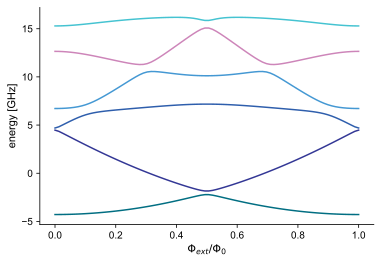

In [3]:
# define an array of flux values
fluxvals = np.linspace(0, 1, 80)
fluxonium_qbt.plot_evals_vs_paramvals(param_name='flux', param_vals=fluxvals);

Note: the argument `param_name` must be one of the parameters with which the qubit in question is initialized. (More flexibility can be achieved by using the `ParameterSweep` class below, using a Hilbert space composed just of the qubit by itself.)

To generate spectral data and return them in the form of a `SpectrumData` object, we may use:

In [4]:
specdata = fluxonium_qbt.get_spectrum_vs_paramvals(param_name='flux', param_vals=fluxvals);
specdata

To retrieve eigenvalues and eigenvectors, one simply accesses the attributes `<SpectrumData>.energy_table` and `<SpectrumData>.state_table`. Furthermore, `SpectrumData` itself allows one to produce a plot of the eigenvalues from the generated data.

These are the lowest six eigenenergies (in GHz, by default) for the first flux value:

In [5]:
specdata.energy_table[0]

array([-4.28338463,  4.47506063,  4.69616798,  6.71864972, 12.64960539,
       15.28847499])

And this generates the eigenenergy plot:

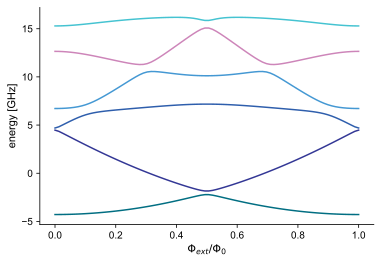

In [6]:
specdata.plot_evals_vs_paramvals();

In a similar manner, one can generate a plot of matrix elements as a function of a parameter value. (Since matrix elements are generally complex-valued, the absolute value is plotted by default. The `mode` argument allows for additional options.) 

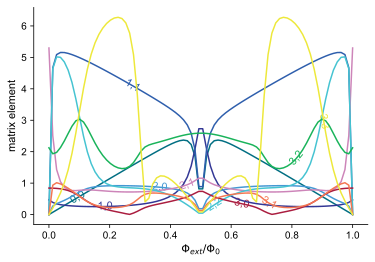

In [7]:
fluxonium_qbt.plot_matelem_vs_paramvals(operator='phi_operator', param_name='flux', param_vals=fluxvals);